# Brain tumor prediction using CNN

### Import all the necessary libraries 

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image


from tensorflow.data import AUTOTUNE

### Load the dataset 

In [25]:
train_dir = r"C:\Users\ASUS\Desktop\Jupyter notebooks\Brain Tumor\Training"
test_dir  = r"C:\Users\ASUS\Desktop\Jupyter notebooks\Brain Tumor\Testing"


In [26]:
img_size = (224, 224)  
batch_size = 32

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"   
)

Found 5711 files belonging to 4 classes.


In [28]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

Found 1311 files belonging to 4 classes.


### Class names

In [29]:
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


### Normalize the images 

In [30]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [31]:
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

### Sample images 

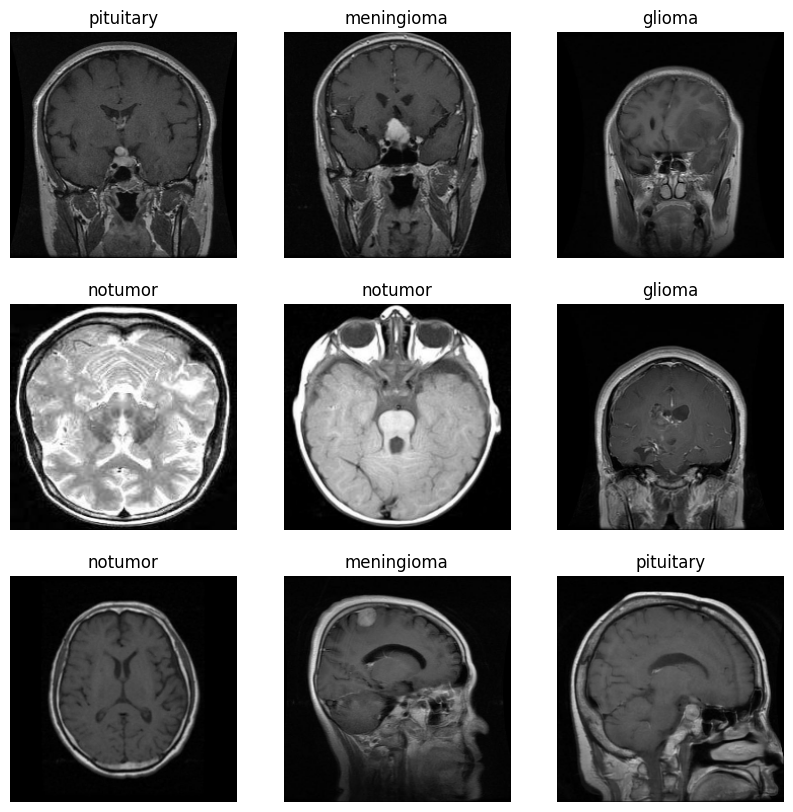

In [32]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):   
    for i in range(9):                   
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")
plt.show()

### Auto tune the images

In [33]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [36]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation="softmax") 
])

In [37]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [38]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
179/179 [==============================] - 23s 59ms/step - loss: 0.7467 - accuracy: 0.7018 - val_loss: 0.5957 - val_accuracy: 0.7719
Epoch 2/10
179/179 [==============================] - 9s 51ms/step - loss: 0.4150 - accuracy: 0.8405 - val_loss: 0.3497 - val_accuracy: 0.8513
Epoch 3/10
179/179 [==============================] - 9s 49ms/step - loss: 0.2884 - accuracy: 0.8869 - val_loss: 0.2902 - val_accuracy: 0.8894
Epoch 4/10
179/179 [==============================] - 9s 51ms/step - loss: 0.2144 - accuracy: 0.9233 - val_loss: 0.2048 - val_accuracy: 0.9314
Epoch 5/10
179/179 [==============================] - 9s 50ms/step - loss: 0.1426 - accuracy: 0.9510 - val_loss: 0.1756 - val_accuracy: 0.9413
Epoch 6/10
179/179 [==============================] - 9s 49ms/step - loss: 0.1019 - accuracy: 0.9617 - val_loss: 0.1647 - val_accuracy: 0.9474
Epoch 7/10
179/179 [==============================] - 9s 49ms/step - loss: 0.0847 - accuracy: 0.9694 - val_loss: 0.1609 - val_accuracy: 0.948

In [45]:
loss, acc = model.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc*100:.2f}%")

41/41 [==============================] - 1s 17ms/step - loss: 0.1752 - accuracy: 0.9489
Test Loss: 0.1752
Test Accuracy: 94.89%


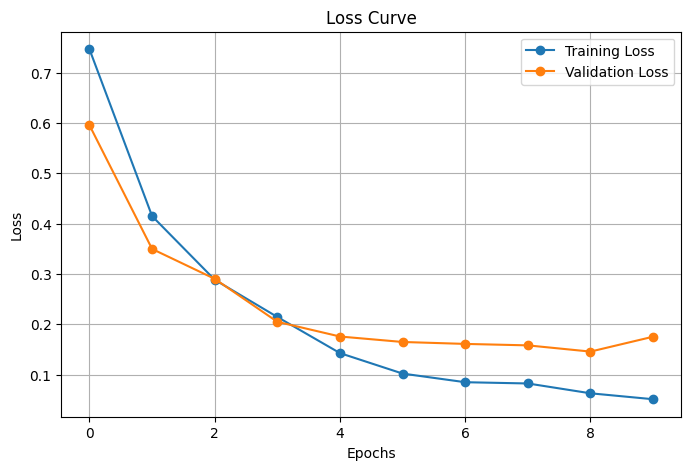

In [40]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    predicted_class = np.argmax(preds[0])
    print("Predicted:", class_names[predicted_class])
    print("True:", class_names[np.argmax(labels[0])])

1/1 [==============================] - 0s 125ms/step
Predicted: meningioma
True: meningioma


In [46]:

for images, labels in test_ds.take(1):
    preds = model.predict(images)               
    pred_classes = np.argmax(preds, axis=1)     
    true_classes = np.argmax(labels.numpy(), axis=1)

    for i in range(5):
        print(f"True: {class_names[true_classes[i]]}, Predicted: {class_names[pred_classes[i]]}")


1/1 [==============================] - 0s 46ms/step
True: meningioma, Predicted: meningioma
True: notumor, Predicted: notumor
True: pituitary, Predicted: pituitary
True: pituitary, Predicted: pituitary
True: glioma, Predicted: meningioma


### Save the CNN model

In [ ]:
model.save("brain_tumor_classifier.h5")